In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

%matplotlib inline

# Análise exploratória de Data Analytics

In [2]:
da = pd.read_csv('tidy-data-analytics.csv', parse_dates=['date'])
da.head()

,turma,date,student,topicos,component,relevance,learn,satisfaction,pace,tool,algorithm
0,2,2019-04-18,426,como capturar os dados (fontes de dados),Fontes de dados,0.5,0.25,0.666667,0.5,False,False
1,2,2019-04-18,426,web scrapping,Fontes de dados,0.5,0.50,0.666667,0.5,False,False
2,2,2019-04-18,426,fórmulas avançadas (IF. VLOOKUP. COUNTIFS. SUM...,Ferramenta,0.5,0.25,0.666667,0.5,True,False
3,2,2019-04-18,426,lógica de programação,Lógica/Programação,0.5,0.25,0.666667,0.5,False,False
4,2,2019-04-18,438,como capturar os dados (fontes de dados),Fontes de dados,0.5,1.00,1.000000,1.0,False,False


## Tipos de dados

Primeiramente checamos se cada feature foi representada com o tipo de dado apropriado:

In [3]:
da.dtypes

turma                    int64
date            datetime64[ns]
student                  int64
topicos                 object
component               object
relevance              float64
learn                  float64
satisfaction           float64
pace                   float64
tool                      bool
algorithm                 bool
dtype: object

## Profiling do conjunto de dados

Em seguida utilizamos o pacote `pandas-profiling` para gerar uma análise exploratória padronizada desse conjunto de dados.

In [4]:
prof = ProfileReport(da)
prof.to_file(output_file='da_eda.html')

## Aprendizagem, relevância, ritmo e satisfação

Uma possível abordagem é procurar uma relação entre aprendizagem, relevância, ritmo e satisfação, visando prever a aprendizagem em função de parâmetros que podem ser mais facilmente manipulados. Abaixo, então, visamos identificar visualmente alguma relação entre essas _features_. Se houver algo visualmente evidente, possivelmente seremos capazes de encontrar um modelo matemático para descrever essa relação.

Começamos definindo uma função para desenhar um gráfico de bolhas para cada par de _features of interest_ (`foi`):

In [5]:
def bubble(foi_x, foi_y):
    """
    Desenha um gráfico de bolhas das duas _features of interest_ (foi)
    """
    subset = da[[foi_x, foi_y]].value_counts().rename('n').reset_index()

    plt.figure(figsize=(12, 8))
    plt.scatter(subset[foi_x], subset[foi_y], s=subset.n, color='darkblue', alpha=0.3)
    plt.show()

### Relevância _versus_ aprendizagem

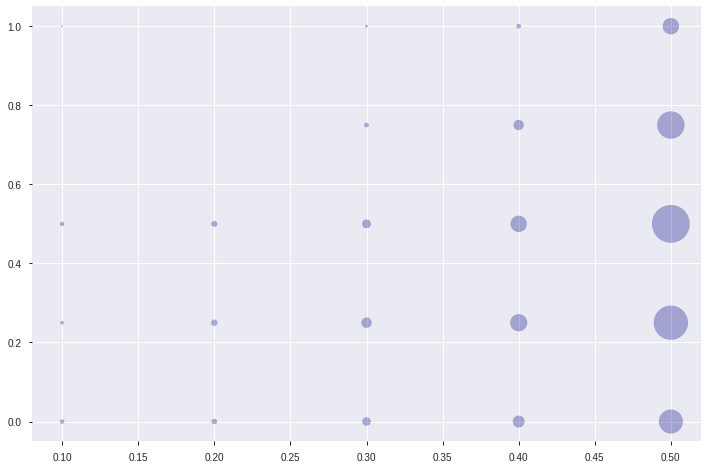

In [6]:
bubble('relevance', 'learn')

### Ritmo _versus_ aprendizagem

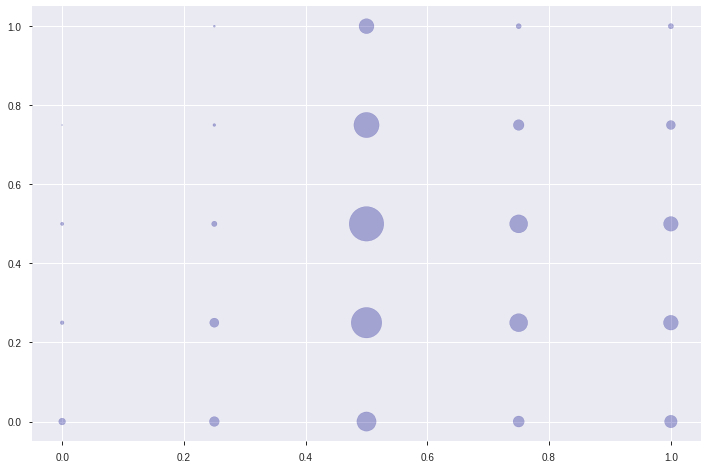

In [7]:
bubble('pace', 'learn')

### Satisfação _versus_ aprendizagem

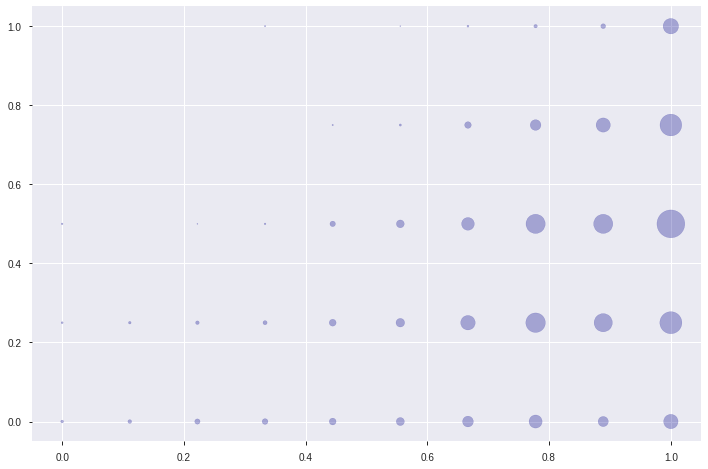

In [8]:
bubble('satisfaction', 'learn')

Devido à escala Likert utilizada para medir cada uma das _features_, não podemos utilizar um regressor para encontrar alguma função `aprendizagem = f(ritmo, relevância, satisfação)`. Mas os gráficos acima sugerem que há aglomerações recorrentes. Por exemplo, não há aprendizagem quando a satisfação é próxima de zero ou quando o ritmo é muito lento. Em vista disso, talvez possamos encontrar algum modelo de agrupamento (_clustering_).